# Рынок заведений общественного питания Москвы

### Описание задачи

Анализ заведений общественного питания Москвы для инвестиционного фонда. 
Подготовить исследование рынка общественного питания Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

### План работы

1. Загрузка и подготовка данных к анализу
2. Предобработка данных
3. Исследовательский анализ
4. Вывод


### Описание данных

Файл moscow_places.csv:

    name — название заведения;
    address — адрес заведения;
    category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
    hours — информация о днях и часах работы;
    lat — широта географической точки, в которой находится заведение;
    lng — долгота географической точки, в которой находится заведение;
    rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
    price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
    avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
      
        «Средний счёт: 1000–1500 ₽»;
        «Цена чашки капучино: 130–220 ₽»;
        «Цена бокала пива: 400–600 ₽».
        и так далее;
    middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
      
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
    middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
      
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
    chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
        0 — заведение не является сетевым
        1 — заведение является сетевым
    district — административный район, в котором находится заведение, например Центральный административный округ;
    seats — количество посадочных мест.


## 1. Загрузка и подготовка данных к анализу

## Импорт библиотек и изучение датасета

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import scipy.stats as stats
from pandas.io.json import json_normalize
import json
import math
import numpy as np
sns.set(rc={'figure.figsize':(15, 20)})
from folium import Map, Marker
from folium.plugins import MarkerCluster
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
df = pd.read_csv('C:/Users/Vasilevs/moscow_places.csv')
df.info()
display(df.head())
print()
print('Количество заведений:')
print(df['name'].count())
print()
print('Количество уникальных наименований:')
print(df['name'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0


Количество заведений:
8406

Количество уникальных наименований:
5614


Значения в столбцах числовые (float64, int64) или текстовые (object)

## Предобработка данных

In [3]:
print('Количество явных дуликатов:', df.duplicated().sum())

Количество явных дуликатов: 0


In [4]:
#удаляю пропуски в hours
df = df.dropna(subset=['hours']).reset_index(drop=True)
df.info()
print('Количество заведений:')
print(df['name'].count())
print()
print('Количество уникальных наименований:')
print(df['name'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7870 entries, 0 to 7869
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7870 non-null   object 
 1   category           7870 non-null   object 
 2   address            7870 non-null   object 
 3   district           7870 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                7870 non-null   float64
 6   lng                7870 non-null   float64
 7   rating             7870 non-null   float64
 8   price              3310 non-null   object 
 9   avg_bill           3808 non-null   object 
 10  middle_avg_bill    3143 non-null   float64
 11  middle_coffee_cup  534 non-null    float64
 12  chain              7870 non-null   int64  
 13  seats              4495 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 860.9+ KB
Количество заведений:
7870

Количество уникальных наименовани

<pre>
В middle_avg_bill и middle_coffee_cup данные для разных категорий заведений, их можно не заполнять.
В seats пропуски для тех заведений, где нет сидячих мест, тоже не трогаю.
<pre\>

In [5]:
# Создаю столбец `street` с названиями улиц из столбца с адресом
df['street'] = df['address'].str.replace('Москва, ', '')
df['street'] = df['address'].str.split(', ').apply(lambda x: x[1])
#проверка
print(df['street'].head())

0              улица Дыбенко
1              улица Дыбенко
2         Клязьминская улица
3    улица Маршала Федоренко
4        Правобережная улица
Name: street, dtype: object


In [6]:
# Создаю столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7)
df['is_24/7'] = df['hours'].str.contains('ежедневно, круглосуточно')

## Анализ данных

### Анализ категории заведений

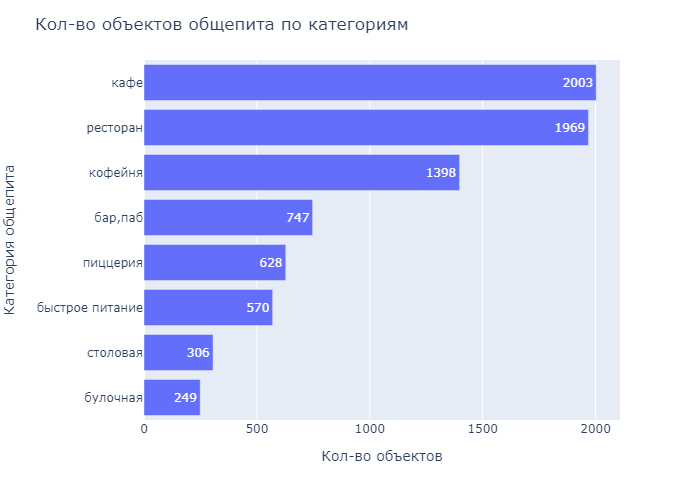

In [7]:
# готовлю данные
group_cat = df.groupby('category').agg({'category': ['count']})
group_cat.columns = ['count']
group_cat = group_cat.sort_values('count').reset_index()

# строю столбчатую диаграмму 
fig = px.bar(group_cat.sort_values(by='count', ascending=True), # загружаем данные и заново их сортирую
             x='count', # указываю столбец с данными для оси X
             y='category', # указываю столбец с данными для оси Y
             text='count' # добавляю аргумент, который отобразит текст с информацией
            )               # о количестве объявлений внутри столбца графика

fig.update_layout(title='Кол-во объектов общепита по категориям',
                xaxis_title='Кол-во объектов',
                yaxis_title='Категория общепита')
fig.show()

TOP-3 категории по кол-ву заведений: ресторан, кафе, кофейня.

### Количество посадочных мест в местах по категориям

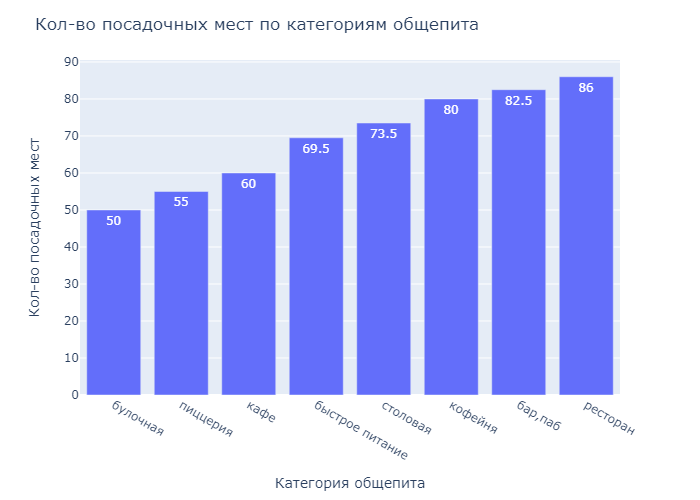

In [8]:
group_cat = df.groupby('category')['seats'].median().sort_values().reset_index()

# строю столбчатую диаграмму 
fig = px.bar(group_cat, # загружаю данные и заново их сортирую
             x='category', # указываю столбец с данными для оси X
             y='seats', # указываю столбец с данными для оси Y
             text='seats' # добавляю аргумент, который отобразит текст с информацией
            )               # о количестве объявлений внутри столбца графика

fig.update_layout(title='Кол-во посадочных мест по категориям общепита',
                xaxis_title='Категория общепита',
                yaxis_title='Кол-во посадочных мест')
fig.show()

TOP-3 категории по медиане посадочных мест: ресторан, бар, кофейня.

### Cоотношение сетевых и несетевых заведений в датасете

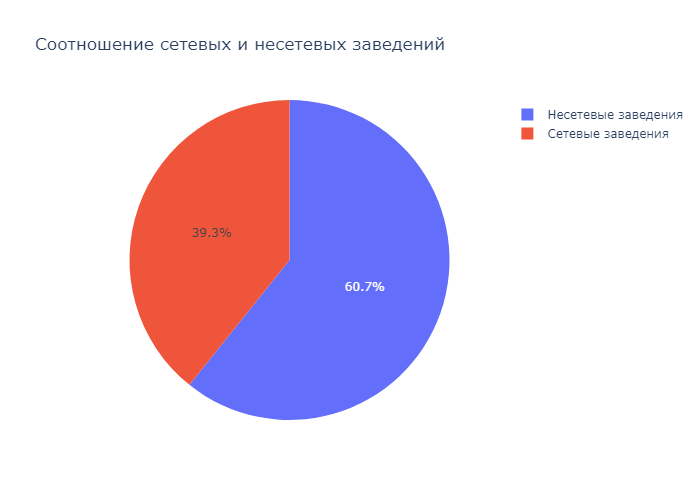

In [9]:
chain = df.groupby('chain').agg({'chain': ['count']})
chain.columns = ['count']
chain = chain.sort_values('count').reset_index()

name_rest = ['Сетевые заведения', 'Несетевые заведения']
values = chain['count']

fig = go.Figure(data=[go.Pie(labels=name_rest, values=values)],
               layout_title_text="Cоотношение сетевых и несетевых заведений")
fig.show()

Несетевых заведений около 60%

### Категории заведений чаще являются сетевыми

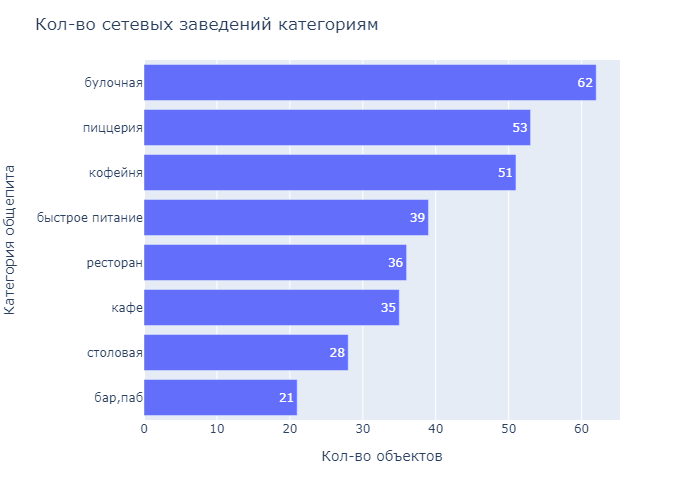

In [10]:
#готовлю данные
df_chain = df.query('chain == 1')
group_cat_1 = df_chain.groupby('category').agg({'category': ['count']})
group_cat_1.columns = ['count_1']
group_cat_1 = group_cat_1.sort_values('count_1').reset_index()

group_cat = df.groupby('category').agg({'category': ['count']})
group_cat.columns = ['count']
group_cat = group_cat.sort_values('count').reset_index()


dubble_cat = group_cat.merge(group_cat_1, how='inner', on=None, left_on='category', right_on='category')

dubble_cat['diff'] = (dubble_cat['count_1'] / dubble_cat['count'] * 100).round()

# строю столбчатую диаграмму 
fig = px.bar(dubble_cat.sort_values(by='diff', ascending=True), # загружаю данные и заново их сортирую
             x='diff', # указываю столбец с данными для оси X
             y='category', # указываю столбец с данными для оси Y
             text='diff' # добавляю аргумент, который отобразит текст с информацией
            )               # о количестве объявлений внутри столбца графика

#оформляю график
fig.update_layout(title='Кол-во сетевых заведений категориям',
                xaxis_title='Кол-во объектов',
                yaxis_title='Категория общепита')
fig.show() # вывожу график

TOP-3 категории по доле сетевых заведений: пиццерия, кофейня, булочная

### ТОП-15 популярных сетей в Москве

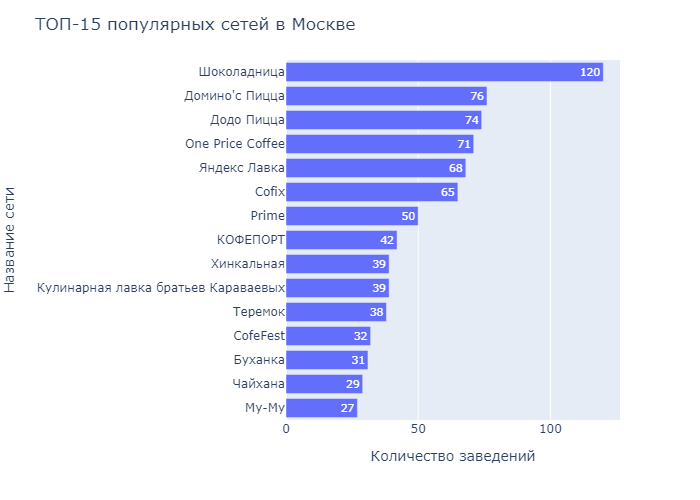

In [11]:
group_cat = df_chain.groupby('name').agg({'name': ['count']})
group_cat.columns = ['count']
group_cat = group_cat.sort_values('count').reset_index().tail(15)

fig = px.bar(group_cat.sort_values(by='count', ascending=True), # загружаю данные и заново их сортирую
             x='count', # указываю столбец с данными для оси X
             y='name', # указываю столбец с данными для оси Y
             text='count' # добавляю аргумент, который отобразит текст с информацией
            )               # о количестве объявлений внутри столбца графика

#оформляю график
fig.update_layout(title='ТОП-15 популярных сетей в Москве',
                xaxis_title='Количество заведений',
                yaxis_title='Название сети')
fig.show() # вывожу график

Самая популярная сеть `Шоколадница`. В ТОП-15 входят в основном кафе, кофейни и пиццерии.

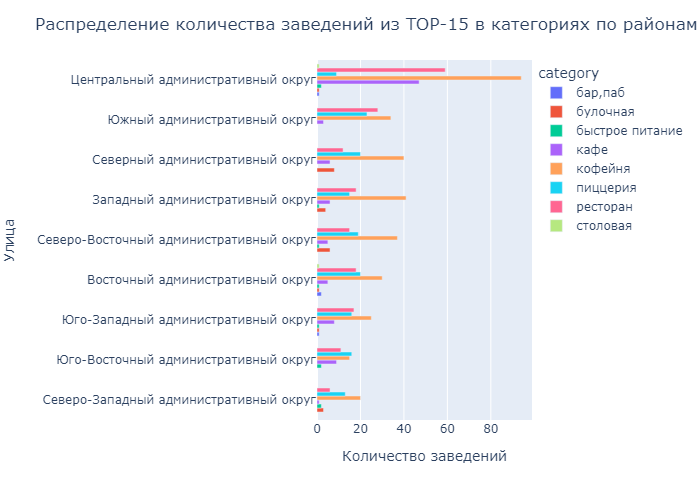

In [12]:
t15 = group_cat['name'].unique().tolist()
t15_df = df[df['name'].isin(t15)]
t15_df_grpd = t15_df.groupby(['district', 'category'])['name'].count().reset_index()
fig = px.bar(t15_df_grpd, x='name', y='district', color='category', barmode = 'group')
fig.update_layout(title='Распределение количества заведений из TOP-15 в категориях по районам',
                xaxis_title='Количество заведений',
                yaxis_title='Улица').update_yaxes(categoryorder='total ascending')
fig.show()

Из ТОP-15 заведений практически во всех районах лидируют кофейни, следом идут ресторан, пиццерия и кафе.

### Общее количество заведений и количество заведений каждой категории по районам.

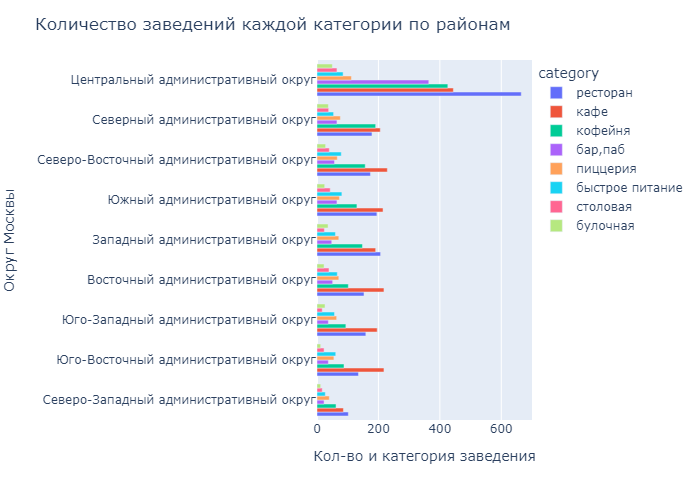

In [13]:
dcategory = df.groupby(['district', 'category'], as_index=False).agg({'name':'count'}).sort_values(by='name', ascending=False)
dcategory.columns = ['district', 'category', 'count']
fig = px.bar(dcategory, x='count', y='district', color='category', barmode = 'group')
fig.update_layout(title='Количество заведений каждой категории по районам',
                xaxis_title='Кол-во и категория заведения',
                yaxis_title='Округ Москвы').update_yaxes(categoryorder='total ascending')
fig.show()

### Общее количество заведений и категорий по районам.

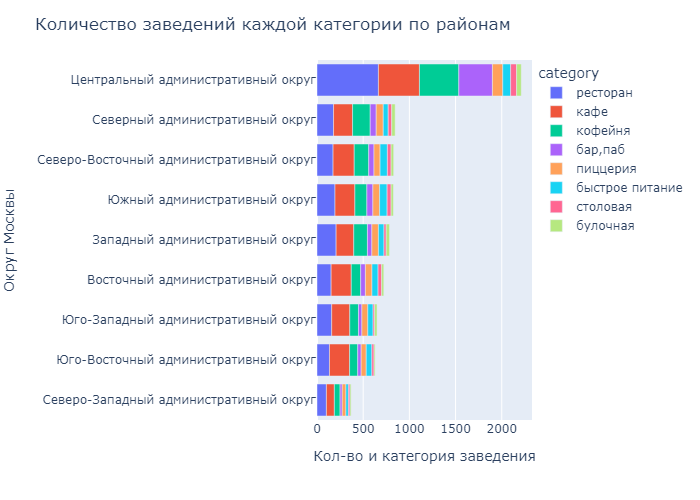

In [14]:
dcategory = df.groupby(['district', 'category'], as_index=False).agg({'name':'count'}).sort_values(by='name', ascending=False)
dcategory.columns = ['district', 'category', 'count']
fig = px.bar(dcategory, x='count', y='district', color='category')
fig.update_layout(title='Количество заведений каждой категории по районам',
                xaxis_title='Кол-во и категория заведения',
                yaxis_title='Округ Москвы').update_yaxes(categoryorder='total ascending')
fig.show()

ЦАО лидирует по количеству заведений и ресторанов(как в абсолютном так и в процентом выражении). Меньше всего заведений в СЗАО.

### Визуализация распределения средних рейтингов по категориям заведений.

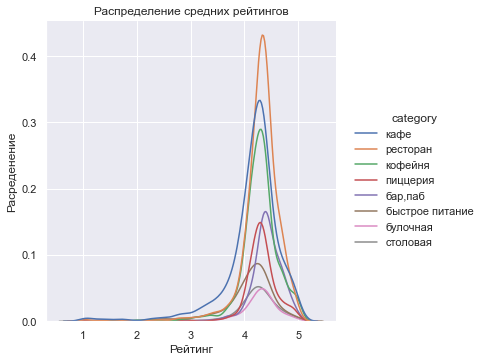

In [15]:
group_cat = df.groupby(['category'])['rating'].median().reset_index().sort_values('rating')
ax = sns.displot(x="rating", hue='category', kind = "kde", data=df)
plt.title('Распределение средних рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Расреденение')
plt.show()

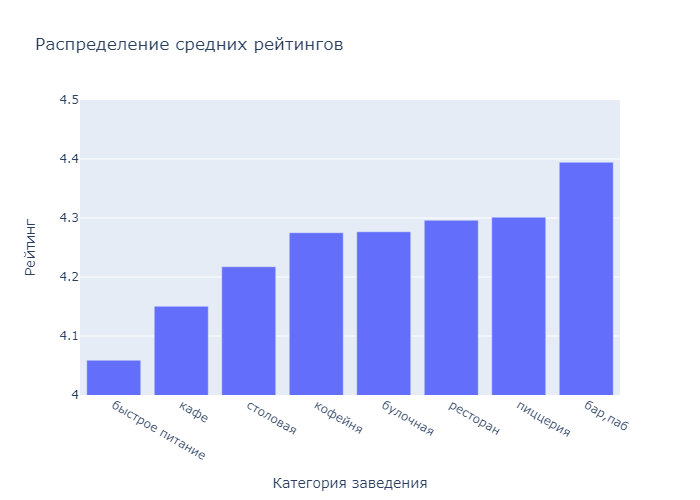

In [16]:
group_cat = df.groupby(['category'])['rating'].mean().reset_index().sort_values('rating')
fig = go.Figure(data=[go.Bar(
            x=group_cat['category'], y=group_cat['rating'],
            textposition='auto',
        )])
fig.update_layout(title='Распределение средних рейтингов',
                xaxis_title='Категория заведения',
                yaxis_title='Рейтинг')
fig.update_yaxes(range=[4, 4.5])
fig.show()

Тройка заведений с высоким средним рейтингом: бар, пиццерия, ресторан

In [17]:
print('АО Москвы в датасете:') 
print(df['district'].unique().tolist())

АО Москвы в датасете:
['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ']


В датасете представлено 9 округов.

### Фоновая картограмма (хороплет) со средним рейтингом заведений каждого района

In [18]:
rating_df = df.groupby('district', as_index=False)['rating'].agg('mean').round(3)
rating_df

district  rating
0         Восточный административный округ   4.189
1          Западный административный округ   4.194
2          Северный административный округ   4.254
3  Северо-Восточный административный округ   4.161
4   Северо-Западный административный округ   4.237
5       Центральный административный округ   4.379
6     Юго-Восточный административный округ   4.124
7      Юго-Западный административный округ   4.191
8             Южный административный округ   4.189

In [19]:
# подключаю модуль для работы с JSON-форматом
import json

# читаю файл и сохраняю в переменной
with open('C:/Users/Vasilevs/admin_level_geomap.geojson', 'r', encoding='utf-8') as f:
    geo_json = json.load(f)

#print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True)) #закоментировал для github

In [20]:
# импортирую карту и хороплет
from folium import Map, Choropleth

# загружаю JSON-файл с границами округов Москвы
state_geo = 'C:/Users/Vasilevs/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаю карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаю хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='OrRd',
    fill_opacity=0.5,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# вывожу карту
#m #закоментировал для github

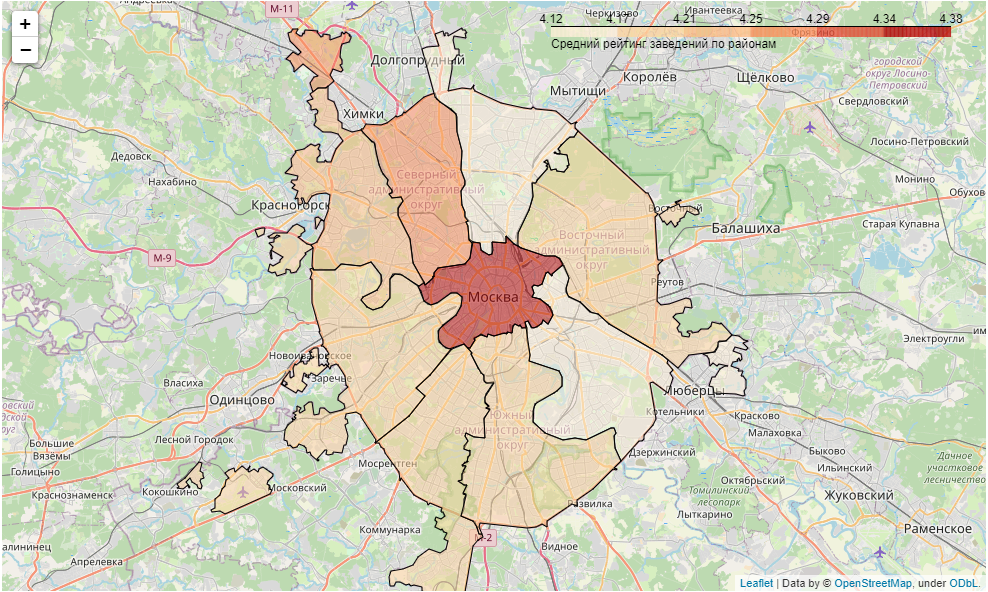

Самый высокий средний рейтинг заведений в ЦАО, самый низкий в СВАО и ЮВАО.

### Заведения на карте

In [21]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаю карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаю пустой кластер, добавляю его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишу функцию, которая принимает строку датафрейма,
# создаю маркер в текущей точке и добавляю его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяю функцию create_clusters() к каждой строке датафрейма
#df.apply(create_clusters, axis=1)

# вывожу карту
#m #закоментировал для github

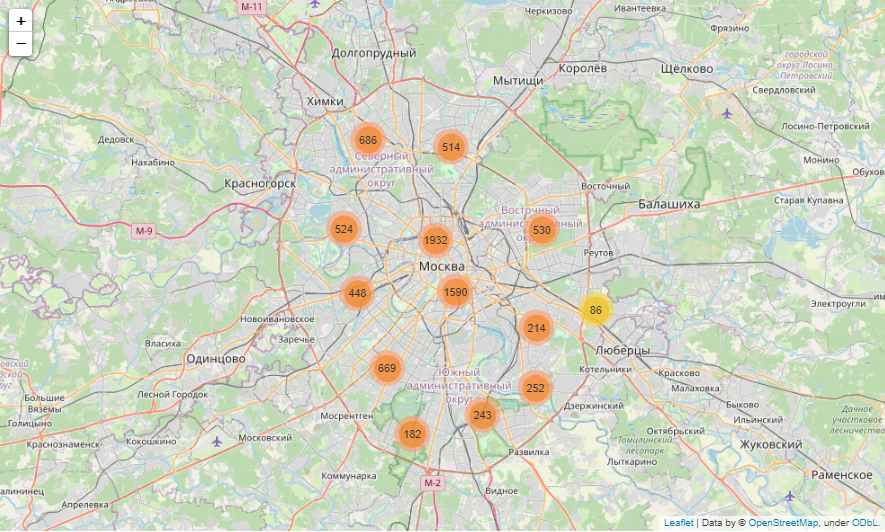

### ТОП-15 улиц по количеству заведений

In [22]:
top_str = df.groupby('street', as_index=False).agg({'name': ['count']})
top_str.columns = ['street', 'count']
top_str_15 = top_str.sort_values('count').reset_index().tail(15)
print('ТОП-15 улиц по количеству заведений:', top_str_15['street'].unique().tolist())

ТОП-15 улиц по количеству заведений: ['улица Миклухо-Маклая', 'Пятницкая улица', 'МКАД', 'улица Вавилова', 'Кутузовский проспект', 'Люблинская улица', 'Ленинградское шоссе', 'Варшавское шоссе', 'Каширское шоссе', 'Дмитровское шоссе', 'Ленинградский проспект', 'Ленинский проспект', 'проспект Вернадского', 'Профсоюзная улица', 'проспект Мира']


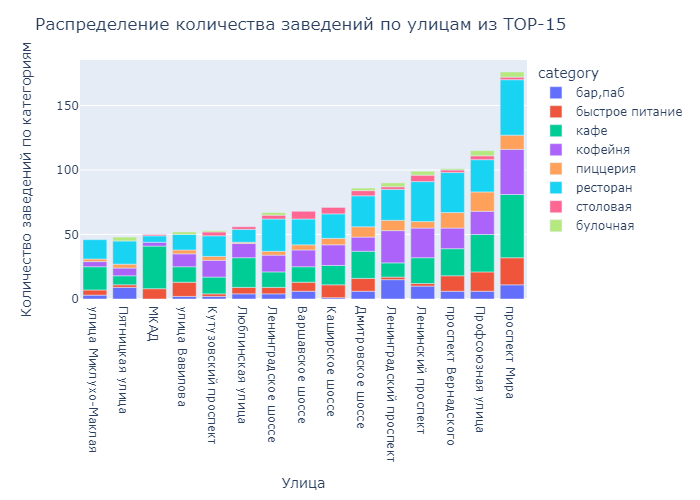

In [23]:
t15 = top_str_15['street'].unique().tolist()

t15_df = df[df['street'].isin(t15)]
t15_df_grpd = t15_df.groupby(['street', 'category'])['name'].count().reset_index()


fig = px.bar(t15_df_grpd, x='street', y='name', color='category')
fig.update_layout(title='Распределение количества заведений по улицам из TOP-15',
                xaxis_title='Улица',
                yaxis_title='Количество заведений по категориям').update_xaxes(categoryorder='total ascending')
fig.show()

Самое большое кол-во заведений из TOP-15 на проспекте Мира, самое маленькое кол-во на улице Миклухо-Маклая

### Улицы с одним заведением общепита

In [24]:
category = df.groupby(['street'], as_index=False).agg({'name':'count'}).sort_values(by='name', ascending=False)
category.columns = ['street', 'count']
one = top_str.query('count == 1').reset_index()
one_cat = one.merge(df, how='inner', on=None, left_on='street', right_on='street')
print(one['street'].unique().tolist())
print(one['street'].count())

['1-й Автозаводский проезд', '1-й Балтийский переулок', '1-й Варшавский проезд', '1-й Голутвинский переулок', '1-й Грайвороновский проезд', '1-й Дербеневский переулок', '1-й Земельный переулок', '1-й Капотнинский проезд', '1-й Кирпичный переулок', '1-й Колобовский переулок', '1-й Котляковский переулок', '1-й Николощеповский переулок', '1-й Новокузнецкий переулок', '1-й Рижский переулок', '1-й Самотёчный переулок', '1-й Сетуньский проезд', '1-й Спасоналивковский переулок', '1-й Щипковский переулок', '1-я Боевская улица', '1-я Магистральная улица', '1-я Парковая улица', '1-я Стекольная улица', '1-я Фрунзенская улица', '1-я Ямская улица', '1-я линия Хорошёвского Серебряного Бора', '11-я Парковая улица', '11-я улица Текстильщиков', '12-я Парковая улица', '14-я Парковая улица', '16-я Парковая улица', '17-й проезд Марьиной Рощи', '2-й Балтийский переулок', '2-й Боткинский проезд', '2-й Верхний Михайловский проезд', '2-й Вышеславцев переулок', '2-й Зачатьевский переулок', '2-й Кожуховский про

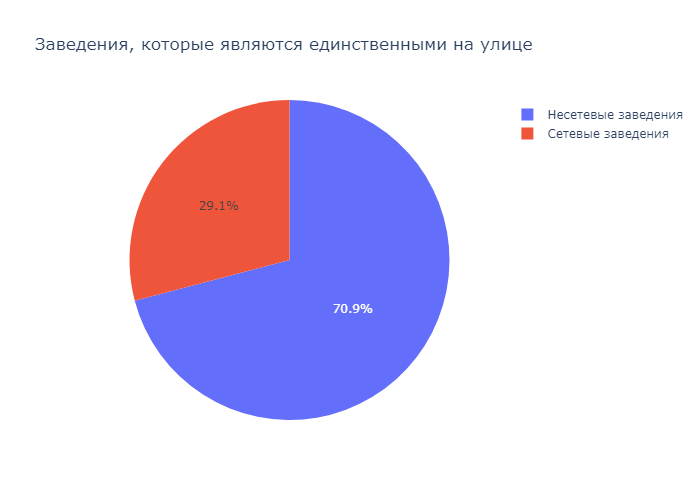

In [25]:
chain = one_cat.groupby('chain').agg({'chain': ['count']})
chain.columns = ['count']
chain = chain.sort_values('count').reset_index()

name_rest = ['Сетевые заведения', 'Несетевые заведения']
values = chain['count']
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values)],
               layout_title_text="Заведения, которые являются единственными на улице")
fig.show()

70% заведений, которые являются единственными на улице - несетевые.

### Анализ средних чеков по районам

In [26]:
avg_bill_df = df.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
avg_bill_df

district  middle_avg_bill
0         Восточный административный округ            575.0
1          Западный административный округ           1000.0
2          Северный административный округ            650.0
3  Северо-Восточный административный округ            500.0
4   Северо-Западный административный округ            700.0
5       Центральный административный округ           1000.0
6     Юго-Восточный административный округ            450.0
7      Юго-Западный административный округ            600.0
8             Южный административный округ            500.0

In [27]:
# создаю карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаю хороплет с помощью конструктора Choropleth и добавляю его на карту
Choropleth(
    geo_data=state_geo,
    data=avg_bill_df,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    legend_name='Средний чек заведений по районам',
).add_to(m)

# вывожу карту
#m #закоментировал для github

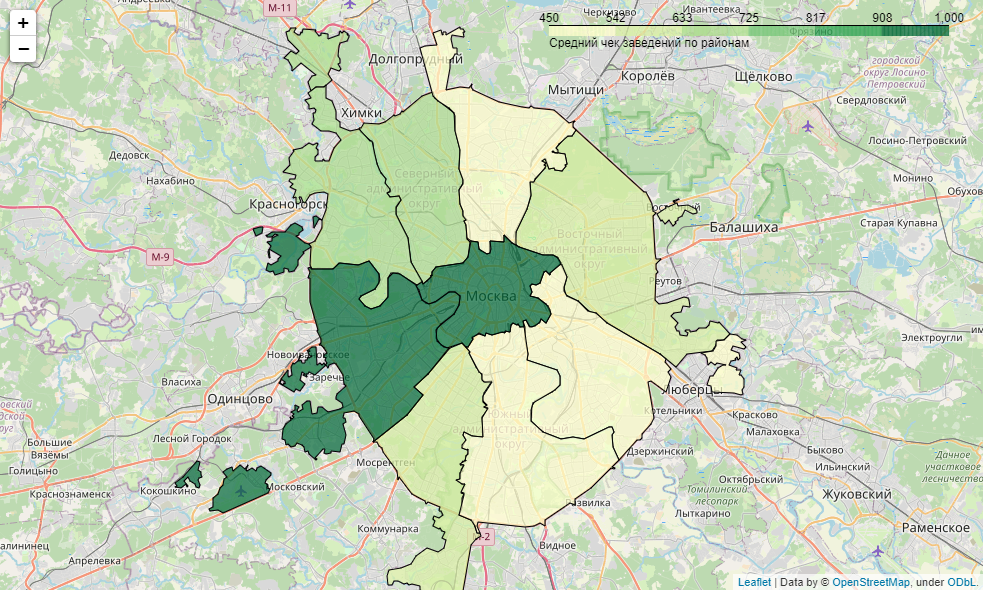

Самый высокий медианный чек в ЦАО и ЗАО, самый низкий чек в СВАО, ЮВАО и ЮАО

### Вывод

<pre>
Количество заведений: 8406, после чистки - 7870
Количество уникальных названий заведений: 5614, после чистки - 5313
TOP-3 категории по кол-ву заведений: ресторан, кафе, кофейня.
TOP-3 категории по медиане посадочных мест: ресторан, бар, кофейня.
Несетевых заведений около 60%
TOP-3 категории по доле сетевых заведений: пиццерия, кофейня, булочная.
Самая популярная сеть Шоколадница. В ТОП-15 входят в основном кафе, кофейни и пиццерии.
Из ТОP-15 заведений практически во всех районах лидируют кофейни, следом идут ресторан, пиццерия и кафе.
ЦАО лидирует по количеству заведений и ресторанов(как в абсолютном так и в процентом выражении). Меньше всего заведений в СЗАО.
Тройка заведений с высоким средним рейтингом: бар, пиццерия, ресторан
В датасете представлено 9 округов.
Самый высокий средний рейтинг заведений в ЦАО, самый низкий в СВАО и ЮВАО.
Самое большое кол-во заведений из TOP-15 на проспекте Мира, самое маленькое кол-во на улице Миклухо-Маклая
70% заведений, которые являются единственными на улице - несетевые.
Самый высокий медианный чек в ЦАО и ЗАО, самый низкий чек в СВАО, ЮВАО и ЮАО
<pre/>

## Детализация исследования: открытие кофейни

### Расположение кофеен

In [28]:
coffee = df.query('category == "кофейня"').reset_index()
print('Кол-во кофеен в исследовании:', coffee['name'].count())

Кол-во кофеен в исследовании: 1398


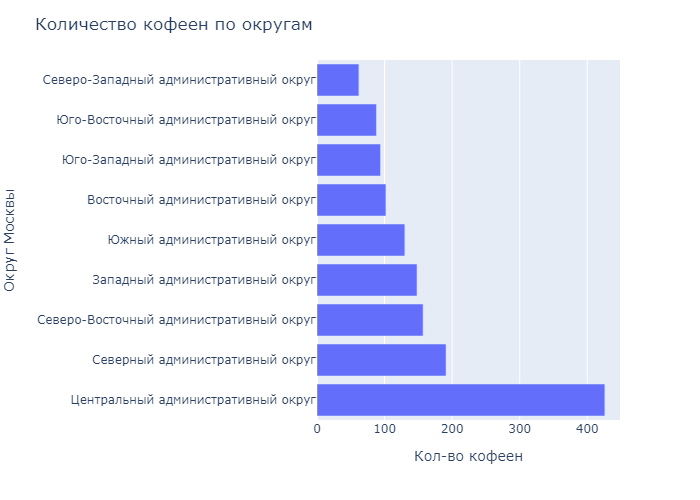

In [29]:
dis_caf = coffee.groupby(['district'], as_index=False).agg({'name':'count'}).sort_values(by='name', ascending=False)
dis_caf.columns = ['district', 'count']
fig = px.bar(dis_caf, x='count', y='district')
fig.update_layout(title='Количество кофеен по округам',
                xaxis_title='Кол-во кофеен',
                yaxis_title='Округ Москвы')
fig.show()

TOP-3 округов по кол-ву кофеен: ЦАО, САО, СВАО.<br>
Больше всего кофеен в центре и на севере столицы.

### Режим работы

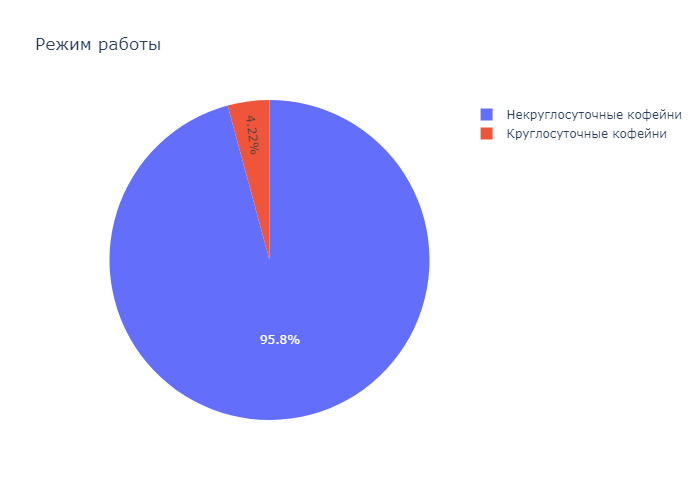

In [30]:
around_the_clock = coffee.groupby('is_24/7').agg({'is_24/7': ['count']})
around_the_clock.columns = ['count']
around_the_clock = around_the_clock.sort_values('count').reset_index()

name_rest = ['Круглосуточные кофейни', 'Некруглосуточные кофейни']
values = around_the_clock['count']
fig = go.Figure(data=[go.Pie(labels=name_rest, values=values)],
               layout_title_text="Режим работы")
fig.show()

Менее 5% кофеен с круглосуточным режимов работы

### Распределение рейтингов

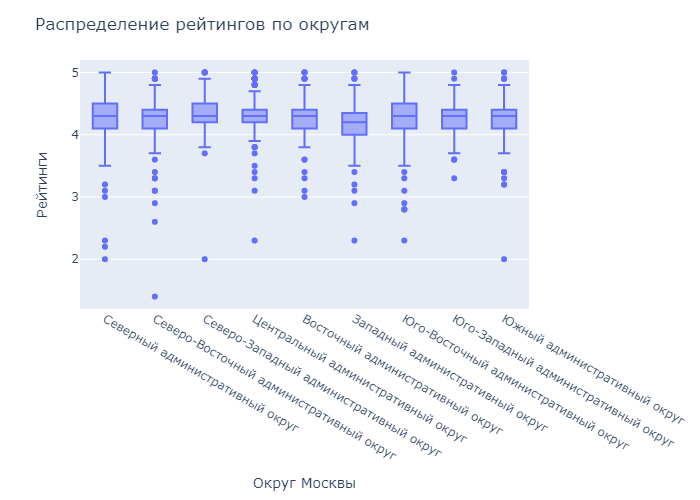

In [31]:
fig = px.box(coffee, x="district", y="rating")
fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(title='Распределение рейтингов по округам',
                xaxis_title='Округ Москвы',
                yaxis_title='Рейтинги')
fig.show()

In [32]:
avg_rating_df = coffee.groupby('district', as_index=False)['rating'].agg('mean')
# создаю карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаю хороплет с помощью конструктора Choropleth и добавляю его на карту
Choropleth(
    geo_data=state_geo,
    data=avg_rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    legend_name='Средний рейтинг кофеен по районам',
).add_to(m)

# вывожу карту
#m #закоментировал для github

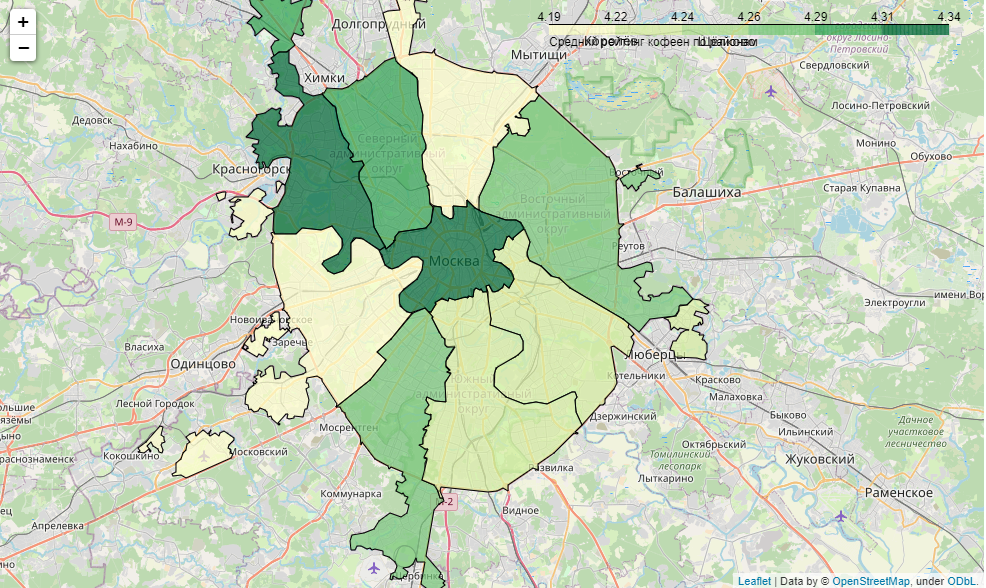

Самый высокий средний рейтинг в ЦАО и СЗАО, самый низкий рейтинг в СВАО и ЗАО(в этом округе и медианное значение низкое)

### Анализ стоимости средней чашки кофе

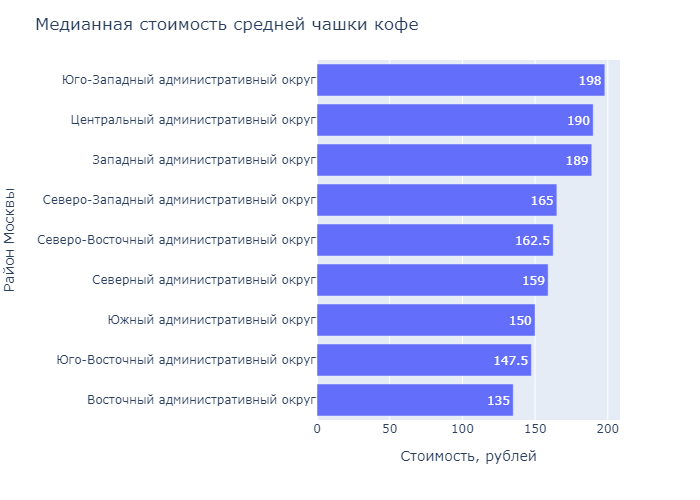

In [33]:
mcc_median_df = coffee.groupby('district').agg({'middle_coffee_cup': ['median']})
mcc_median_df.columns = ['median']
mcc_median_df = mcc_median_df.sort_values('median').reset_index()

fig = px.bar(mcc_median_df.sort_values(by='median', ascending=True), # загружаю данные и заново их сортируем
             x='median', # указываю столбец с данными для оси X
             y='district', # указываю столбец с данными для оси Y
             text='median' # добавляю аргумент, который отобразит текст с информацией
            )               # о количестве объявлений внутри столбца графика

#оформляю график
fig.update_layout(title='Медианная стоимость средней чашки кофе',
                xaxis_title='Стоимость, рублей',
                yaxis_title='Район Москвы')
fig.show() # вывожу график

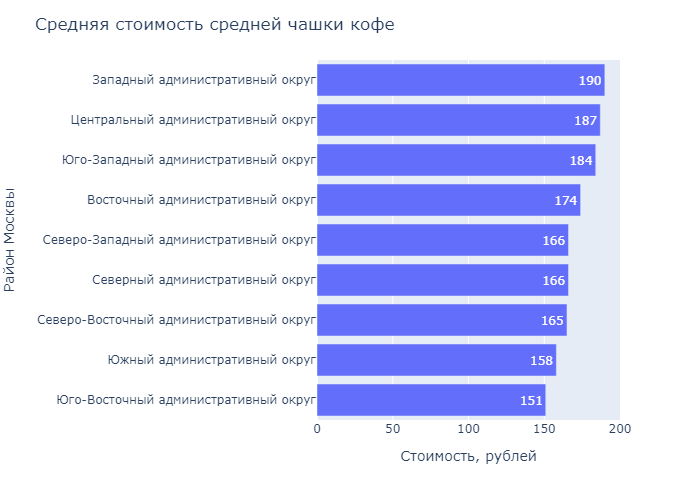

In [34]:
mcc_mean_df = coffee.groupby('district').agg({'middle_coffee_cup': ['mean']}).round()
mcc_mean_df.columns = ['mean']
mcc_mean_df = mcc_mean_df.sort_values('mean').reset_index()

fig = px.bar(mcc_mean_df.sort_values(by='mean', ascending=True), # загружаю данные и заново их сортируем
             x='mean', # указываю столбец с данными для оси X
             y='district', # указываю столбец с данными для оси Y
             text='mean' # добавляю аргумент, который отобразит текст с информацией
            )               # о количестве объявлений внутри столбца графика

#оформляю график
fig.update_layout(title='Средняя стоимость средней чашки кофе',
                xaxis_title='Стоимость, рублей',
                yaxis_title='Район Москвы')
fig.show() # вывожу график

Самые дорогие средние чашки кофе в ЦАО, ЗАО, ЮЗАО

In [35]:
print('Медианная стоимость средней чашки кофе в кофейнях в Москве:', round(coffee['middle_coffee_cup'].median()))
print('Средняя стоимость средней чашки кофе в кофейнях в Москве:', round(coffee['middle_coffee_cup'].mean()))

Медианная стоимость средней чашки кофе в кофейнях в Москве: 170
Средняя стоимость средней чашки кофе в кофейнях в Москве: 175


### Вывод

<pre>
TOP-3 округов по кол-ву кофеен: ЦАО, САО, СВАО.
Больше всего кофеен в центре и на севере столицы.
Менее 5% кофеен с круглосуточным режимов работы.
Самый высокий средний рейтинг в ЦАО и СЗАО, самый низкий рейтинг в СВАО и ЗАО(в этом округе и медианное значение низкое).
Самые дорогие средние чашки кофе в ЦАО, ЗАО, ЮЗАО
Медианная стоимость средней чашки кофе в кофейнях в Москве: 170.0
Средняя стоимость средней чашки кофе в кофейнях в Москве: 175.0
<pre/>

## Рекомендации по открытию кофейни

В СЗАО меньше всего кофеен и других заведений общепита заведений, в целом.
В СЗАО высокий средний рейтинг для заведений этого типа, при этом стоимость чашки кофе меньше среднего и медианного значения по Москве.Есть куда расти.

In [36]:
szao = df.query('district == "Северо-Западный административный округ"')
szao
# выбираю популярные улицы для заведений общепита
top_str_szao = szao.groupby('street', as_index=False).agg({'name': ['count']})
top_str_szao.columns = ['street', 'count']
top_str_szao_15 = top_str_szao.sort_values('count').reset_index().tail(15)
print('TOP-15 улиц для общепита:', top_str_szao_15['street'].unique().tolist())

TOP-15 улиц для общепита: ['Химкинский бульвар', 'улица Кулакова', '3-я Хорошёвская улица', 'Тушинская улица', 'Волоколамское шоссе', 'Планерная улица', 'проспект Маршала Жукова', 'Туристская улица', 'Щукинская улица', 'Шелепихинская набережная', 'улица Маршала Катукова', 'Сходненская улица', 'улица Народного Ополчения', 'улица Маршала Бирюзова', 'улица Свободы']


street  all_count category  cof_count  difference
6          Химкинский бульвар          9  кофейня          1        11.0
5             Тушинская улица         10  кофейня          1        10.0
0       3-я Хорошёвская улица         10  кофейня          2        20.0
10             улица Кулакова         10  кофейня          3        30.0
2             Планерная улица         11  кофейня          1         9.0
4            Туристская улица         12  кофейня          1         8.0
9     проспект Маршала Жукова         12  кофейня          2        17.0
8             Щукинская улица         12  кофейня          3        25.0
7    Шелепихинская набережная         14  кофейня          4        29.0
12     улица Маршала Катукова         15  кофейня          2        13.0
13  улица Народного Ополчения         19  кофейня          3        16.0
3           Сходненская улица         19  кофейня          7        37.0
11     улица Маршала Бирюзова         20  кофейня          5        25.0
14              улица Свободы         21  кофейня          2        10.0
1         Волоколамское шоссе         29  кофейня          5        17.0

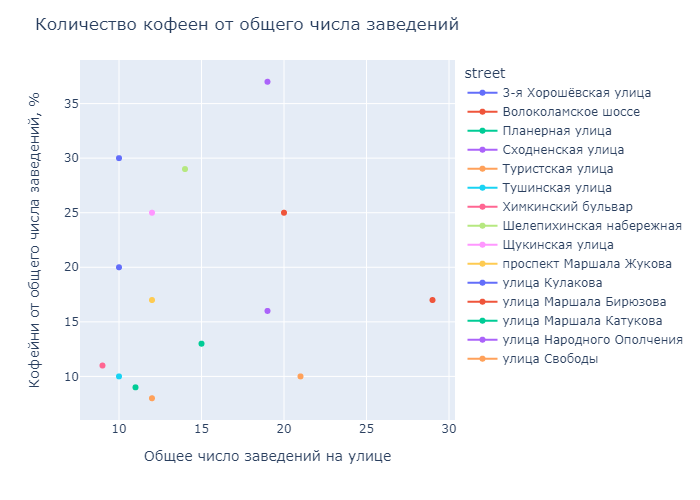

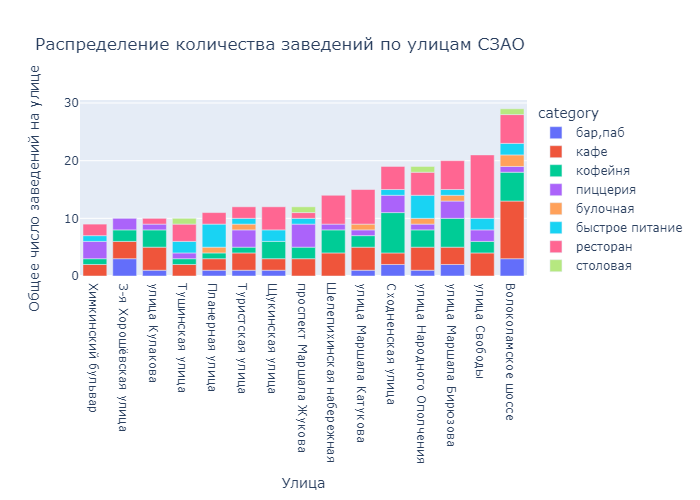

In [37]:
szao_t15 = top_str_szao_15['street'].unique().tolist()
szao_t15_df = df[df['street'].isin(szao_t15)]
szao_t15_df_grpd = szao_t15_df.groupby(['street', 'category'])['name'].count().reset_index()

szao_t15_all = szao_t15_df.groupby(['street'])['name'].count().reset_index()
szao_t15_coff = szao_t15_df_grpd.query('category == "кофейня"')
best_street  = szao_t15_all.merge(szao_t15_coff, how='inner', on=None, left_on='street', right_on='street')
best_street['diff'] = (best_street['name_y'] / best_street['name_x']*100).round()
best_street.columns = ['street', 'all_count', 'category', 'cof_count', 'difference']
display(best_street.sort_values(by=['all_count', 'difference']))

fig = px.line(best_street, # загружаю данные
              x='all_count', # указываю столбец с данными для оси X
              y='difference', # указываю столбец с данными для оси Y
              color='street', # обозначаю категорию для разделения цветом
              markers=True) # отображаю маркеры (точки) на графике
# оформляю график
fig.update_layout(title='Количество кофеен от общего числа заведений',
                   xaxis_title='Общее число заведений на улице',
                   yaxis_title='Кофейни от общего числа заведений, %')
fig.show() # вывожу график

fig = px.bar(szao_t15_df_grpd,
             x='street',
             y='name',
             title='Распределение количества заведений по улицам СЗАО',
             color = 'category')
# оформляю график
fig.update_layout(title='Распределение количества заведений по улицам СЗАО',
                   xaxis_title='Улица',
                   yaxis_title='Общее число заведений на улице').update_xaxes(categoryorder='total ascending')
fig.show()

Улицы с низким количеством кофеен относительно общего числа заведений имеют высокий потенциал: улица Свободы, Волоколамское шоссе и улица Народного Ополчения. Эти же улицы имеют наибольшее число заведений, что косвенно указывает на высокую проходимость.

### Вывод:

<pre>
В СЗАО меньше всего кофеен и других заведений общепита заведений, в целом. В СЗАО высокий средний рейтинг для заведений этого типа, при этом стоимость чашки кофе меньше среднего и медианного значения по Москве. Есть куда расти.

Улицы с низким количеством кофеен относительно общего числа заведений имеют высокий потенциал: улица Свободы, Волоколамское шоссе и улица Народного Ополчения. Эти же улицы имеют наибольшее число заведений, что косвенно указывает на высокую проходимость.
<pre/>